In [14]:
import pandas as pd
df = pd.read_csv('Breast_Cancer.csv')
delete_column = ['Status']
df.drop(columns=delete_column, inplace=True)
df.to_csv('Breast_Cancer.csv', index=False)
df.isnull().sum()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
dfle = df
dfle['Race'] = le.fit_transform(dfle['Race'])
dfle['Marital Status'] = le.fit_transform(dfle['Marital Status'])
dfle['T Stage'] = le.fit_transform(dfle['T Stage'])
dfle['N Stage'] = le.fit_transform(dfle['N Stage'])
dfle['6th Stage'] = le.fit_transform(dfle['6th Stage'])
dfle['differentiate'] = le.fit_transform(dfle['differentiate'])
dfle['Grade'] = le.fit_transform(dfle['Grade'])
dfle['A Stage'] = le.fit_transform(dfle['A Stage'])
dfle['Tumor Size'] = le.fit_transform(dfle['Tumor Size'])
dfle['Estrogen Status'] = le.fit_transform(dfle['Estrogen Status'])
dfle['Progesterone Status'] = le.fit_transform(dfle['Progesterone Status'])

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
model = LinearRegression()

In [18]:
X = dfle.drop(['Survival Months'],axis='columns')
y = dfle['Survival Months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_test, y_test)

LinearRegression()

In [19]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [20]:
model.predict([[68, 2, 1, 0, 0, 0, 1, 3, 1, 1, 1, 1, 24, 1]])

C:\Users\JJ\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([76.80944701])

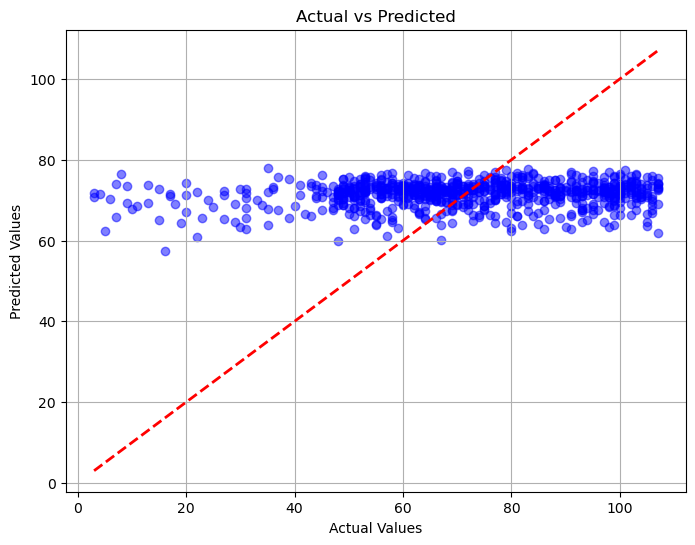

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='blue', alpha=0.5)
plt.title('Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.show()
